In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from prophet import Prophet

from sklearn.metrics import mean_absolute_error, mean_squared_error

## Random data
No pattern, difficult to predict.

19:37:51 - cmdstanpy - INFO - Chain [1] start processing
19:37:51 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error (MAE): 193.77739923038735
Root Mean Squared Error (RMSE): 227.638886637485


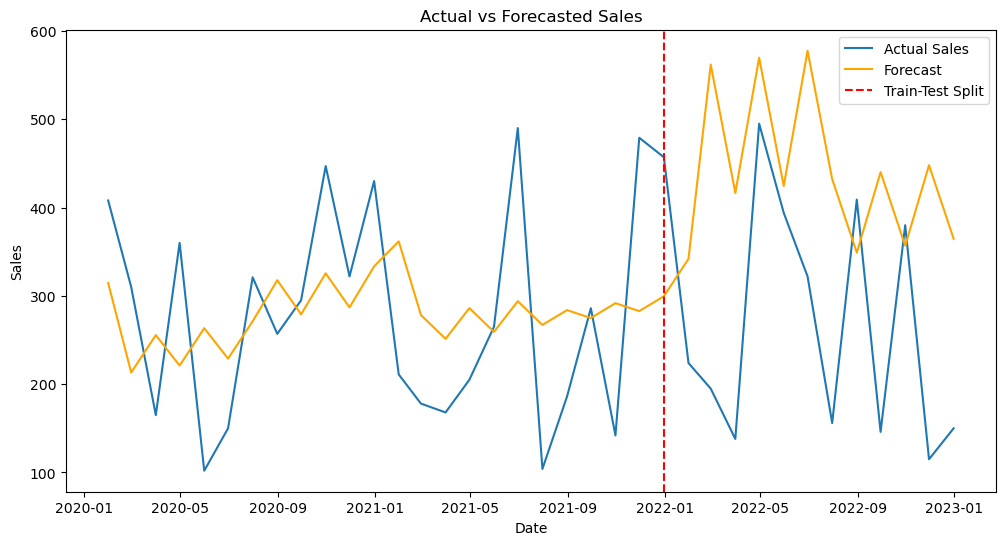

In [7]:
from prophet import Prophet
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Sample sales data
data = {
    'ds': pd.date_range(start='2020-01-01', periods=36, freq='M'), # 36 periods, each period is 1 month
    'y': np.random.randint(100, 500, size=36)
}
sales_data = pd.DataFrame(data)

# Split data into train and test
train = sales_data.iloc[:-12]  # Use all except the last 12 months as training
test = sales_data.iloc[-12:]   # Use the last 12 months as testing

# Initialize and fit Prophet model
model = Prophet()
model.add_seasonality(name='monthly', period=30.5, fourier_order=3)  # smaller fourier means smoother prediction line
model.fit(train)

# Make future dataframe for forecast
future = model.make_future_dataframe(periods=12, freq='M')  # Predict 12 months ahead
forecast = model.predict(future)

# Evaluation metrics on test set
test_forecast = forecast.iloc[-12:][['ds', 'yhat']].set_index('ds')  # the date column is moved to be an index
actual_vs_forecast = test.set_index('ds').join(test_forecast)

mae = mean_absolute_error(actual_vs_forecast['y'], actual_vs_forecast['yhat'])
rmse = mean_squared_error(actual_vs_forecast['y'], actual_vs_forecast['yhat'], squared=False)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Plot actual vs forecasted values
plt.figure(figsize=(12, 6))
plt.plot(sales_data['ds'], sales_data['y'], label='Actual Sales')
plt.plot(forecast['ds'], forecast['yhat'], label='Forecast', color='orange')
plt.axvline(x=train['ds'].iloc[-1], color='red', linestyle='--', label='Train-Test Split')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Actual vs Forecasted Sales')
plt.show()

## Grocery sales (from Kaggle)

19:40:20 - cmdstanpy - INFO - Chain [1] start processing


Number of unique days in dataset: 89


19:40:20 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error (MAE): 1282.5552990873432
Root Mean Squared Error (RMSE): 1546.1473157325272


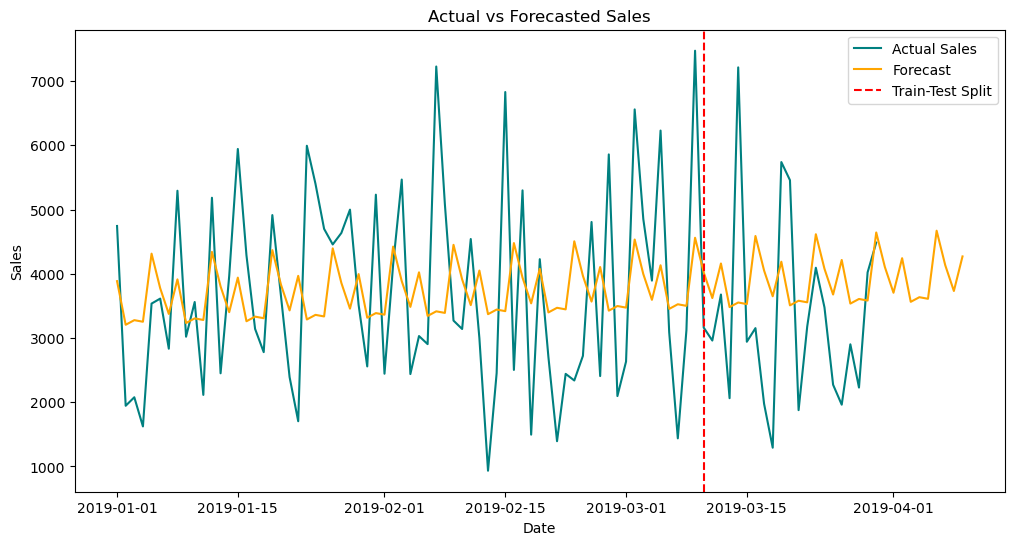

In [8]:
from prophet import Prophet
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Load and preprocess the dataset
data = pd.read_csv('supermarket_sales.csv')
data['Date'] = pd.to_datetime(data['Date'])
data = data[['Date', 'Total']]
data = data.groupby('Date').sum().reset_index()

unique_days = data['Date'].nunique()
print(f"Number of unique days in dataset: {unique_days}")

# Prepare data for Prophet which needs columns to be called ds and y
data = data.rename(columns={'Date': 'ds', 'Total': 'y'})

# Split data into train and test
train = data.iloc[:-20]  # Use all except the last 30 days as training
test = data.iloc[-20:]   # Use the last 30 days as testing

# Initialize and fit Prophet model
model = Prophet(weekly_seasonality=True, changepoint_prior_scale=0.05) # Frequency with which forecast line can change direction
model.fit(train)

# Make future dataframe for forecast
future = model.make_future_dataframe(periods=30, freq='D')  # Predict 30 days ahead
forecast = model.predict(future)

# Evaluation metrics on test set
test_forecast = forecast[forecast['ds'].isin(test['ds'])][['ds', 'yhat']].set_index('ds')
actual_vs_forecast = test.set_index('ds').join(test_forecast)

mae = mean_absolute_error(actual_vs_forecast['y'], actual_vs_forecast['yhat'])
rmse = mean_squared_error(actual_vs_forecast['y'], actual_vs_forecast['yhat'], squared=False)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Plot actual vs forecasted values
plt.figure(figsize=(12, 6))
plt.plot(data['ds'], data['y'], label='Actual Sales', color='teal')
plt.plot(forecast['ds'], forecast['yhat'], label='Forecast', color='orange')
plt.axvline(x=train['ds'].iloc[-1], color='red', linestyle='--', label='Train-Test Split')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Actual vs Forecasted Sales')
plt.show()

## Retail sales

In [10]:
# Load and preprocess the dataset
data = pd.read_csv('retail_sales.csv')
data['Date'] = pd.to_datetime(data['Date'])
data = data[['Date', 'Total']]

unique_days = data['Date'].nunique()
print(f"Number of unique days in dataset: {unique_days}")

Number of unique days in dataset: 345


19:44:34 - cmdstanpy - INFO - Chain [1] start processing
19:44:34 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error (MAE): 785.480746159135
Root Mean Squared Error (RMSE): 986.9846523439865


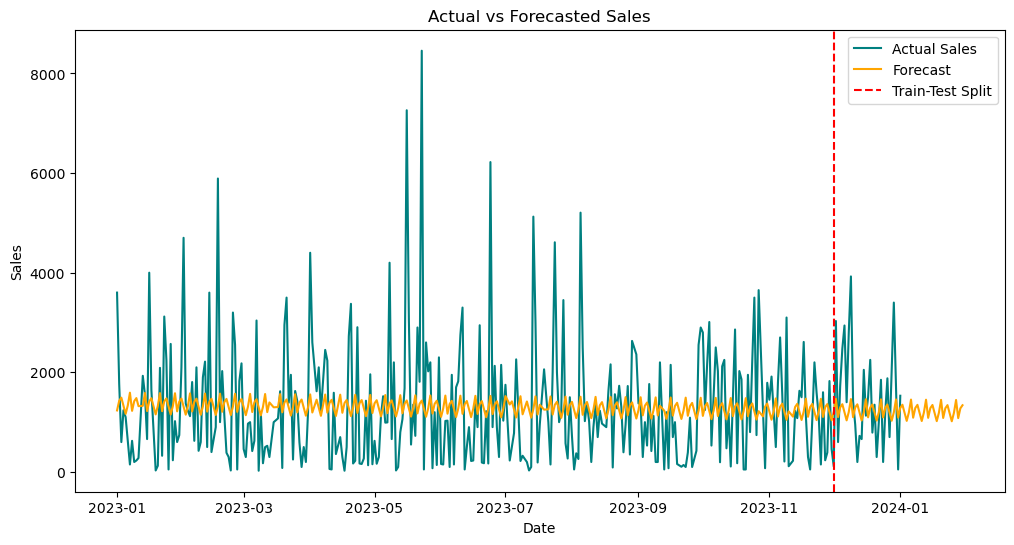

In [11]:
# Aggregate total sales by date
daily_sales = data.groupby('Date')['Total'].sum().reset_index()
daily_sales.head()

# Rename columns to fit Prophet's requirements
daily_sales = daily_sales.rename(columns={'Date': 'ds', 'Total': 'y'})
daily_sales.head()

# Split data into train and test
train = daily_sales.iloc[:-30]  # Use all except the last 30 days as training
test = daily_sales.iloc[-30:]   # Use the last 30 days as testing

# Initialize and fit Prophet model
model = Prophet((weekly_seasonality=True, changepoint_prior_scale=0.1)
# model.add_seasonality(name='monthly', period=30.5, fourier_order=5)
model.fit(train)

# Make future dataframe for forecast
future = model.make_future_dataframe(periods=60, freq='D')  # Predict 30 days ahead
forecast = model.predict(future)


# Evaluation metrics on test set
test_forecast = forecast[forecast['ds'].isin(test['ds'])][['ds', 'yhat']].set_index('ds')
# The actual values (test['y']) are joined with the predicted values (test_forecast['yhat']) based on the date ('ds')
actual_vs_forecast = test.set_index('ds').join(test_forecast)

# Drop rows with NaN values
actual_vs_forecast = actual_vs_forecast.dropna()

mae = mean_absolute_error(actual_vs_forecast['y'], actual_vs_forecast['yhat'])
rmse = mean_squared_error(actual_vs_forecast['y'], actual_vs_forecast['yhat'], squared=False)
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Plot actual vs forecasted values
plt.figure(figsize=(12, 6))
plt.plot(daily_sales['ds'], daily_sales['y'], label='Actual Sales', color='teal')
plt.plot(forecast['ds'], forecast['yhat'], label='Forecast', color='orange')
plt.axvline(x=train['ds'].iloc[-1], color='red', linestyle='--', label='Train-Test Split')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Actual vs Forecasted Sales')
plt.show()

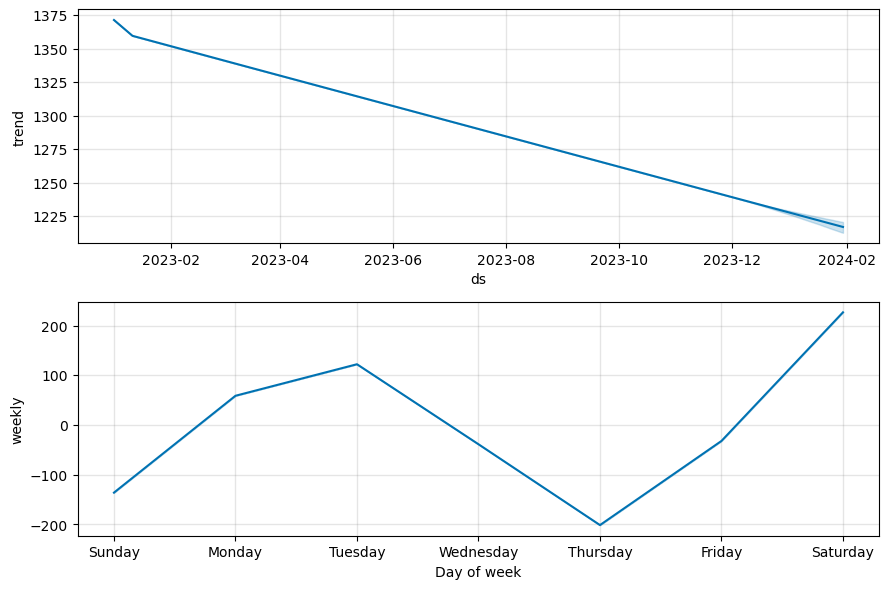

In [5]:
# Plot the forecast components: trend, weekly seasonality, and monthly seasonality
fig = model.plot_components(forecast)
plt.show()

19:36:37 - cmdstanpy - INFO - Chain [1] start processing


            ds     y
0   2023-01-02    90
1   2023-01-05  1050
2   2023-01-06   120
3   2023-01-07    75
4   2023-01-08    25
..         ...   ...
214 2023-12-27   600
215 2023-12-28    75
216 2023-12-29   100
217 2023-12-31    50
218 2024-01-01    30

[219 rows x 2 columns]


19:36:37 - cmdstanpy - INFO - Chain [1] done processing


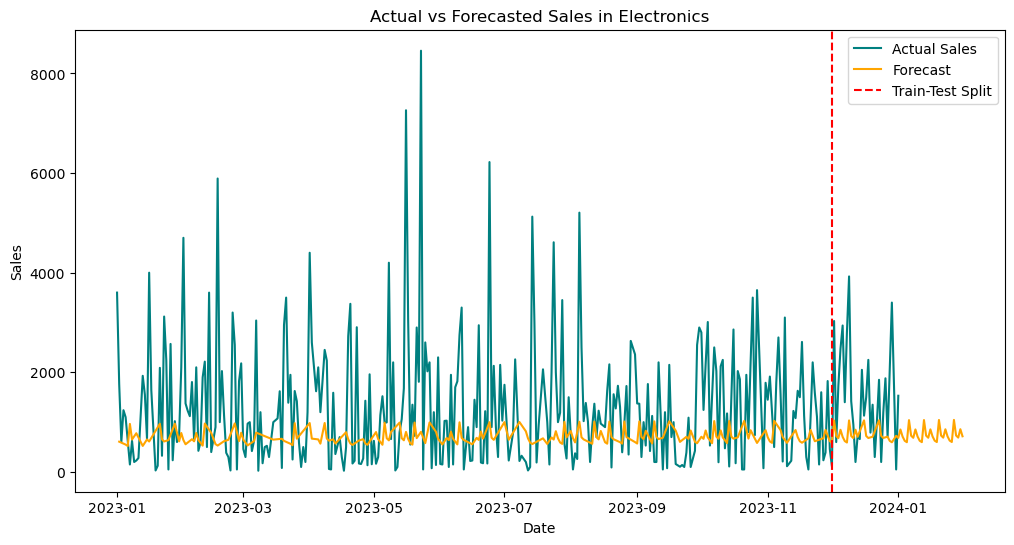

In [6]:
# Load and preprocess the dataset
data = pd.read_csv('retail_sales.csv')
data['Date'] = pd.to_datetime(data['Date'])

# Forecast sales for each product category
categories = data['Product Category'].unique()

for category in categories:
    category_data = data[
      data['Product Category'] == category].groupby('Date')[
      'Total'].sum().reset_index()
    category_data = category_data.rename(
      columns={'Date': 'ds', 'Total': 'y'})
    
print(category_data)
    
model = Prophet()
model.fit(category_data)
    
future = model.make_future_dataframe(periods=30, freq='D')
forecast = model.predict(future)
    
    # Plot actual vs forecasted values
plt.figure(figsize=(12, 6))
plt.plot(daily_sales['ds'], daily_sales['y'], label='Actual Sales', color='teal')
plt.plot(forecast['ds'], forecast['yhat'], label='Forecast', color='orange')
plt.axvline(x=train['ds'].iloc[-1], color='red', linestyle='--', label='Train-Test Split')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title(f'Actual vs Forecasted Sales in {category}')
plt.show()

Train-Test Split (Red Dashed Line) marks the division between the training and test datasets.  
Prophet was trained on the data to the left of the line and tested (validated) on the data to the right, plus additional forecast for some future days.  
Key Observations:  
The forecast (yellow line) seems to underrepresent the peaks and valleys of the actual sales. This is typical for Prophet, as it focuses on capturing trends and seasonality rather than extreme fluctuations.  
If the forecast aligns reasonably well with the actual sales in the test set (to the right of the red line), it indicates the model has performed adequately. However, the smoothness of forecast line might suggest the need for fine-tuning.